In [21]:
using NCDatasets
using CairoMakie

In [22]:
rootdir = "../data/processed_output/"
filelist = [e for e in readdir(rootdir) if e[1]!="."[1]]

4-element Vector{String}:
 "shear_instability_TKE_Ri=0.001.nc"
 "shear_instability_TKE_Ri=0.1.nc"
 "shear_instability_TKE_Ri=0.3.nc"
 "shear_instability_TKE_Ri=0.5.nc"

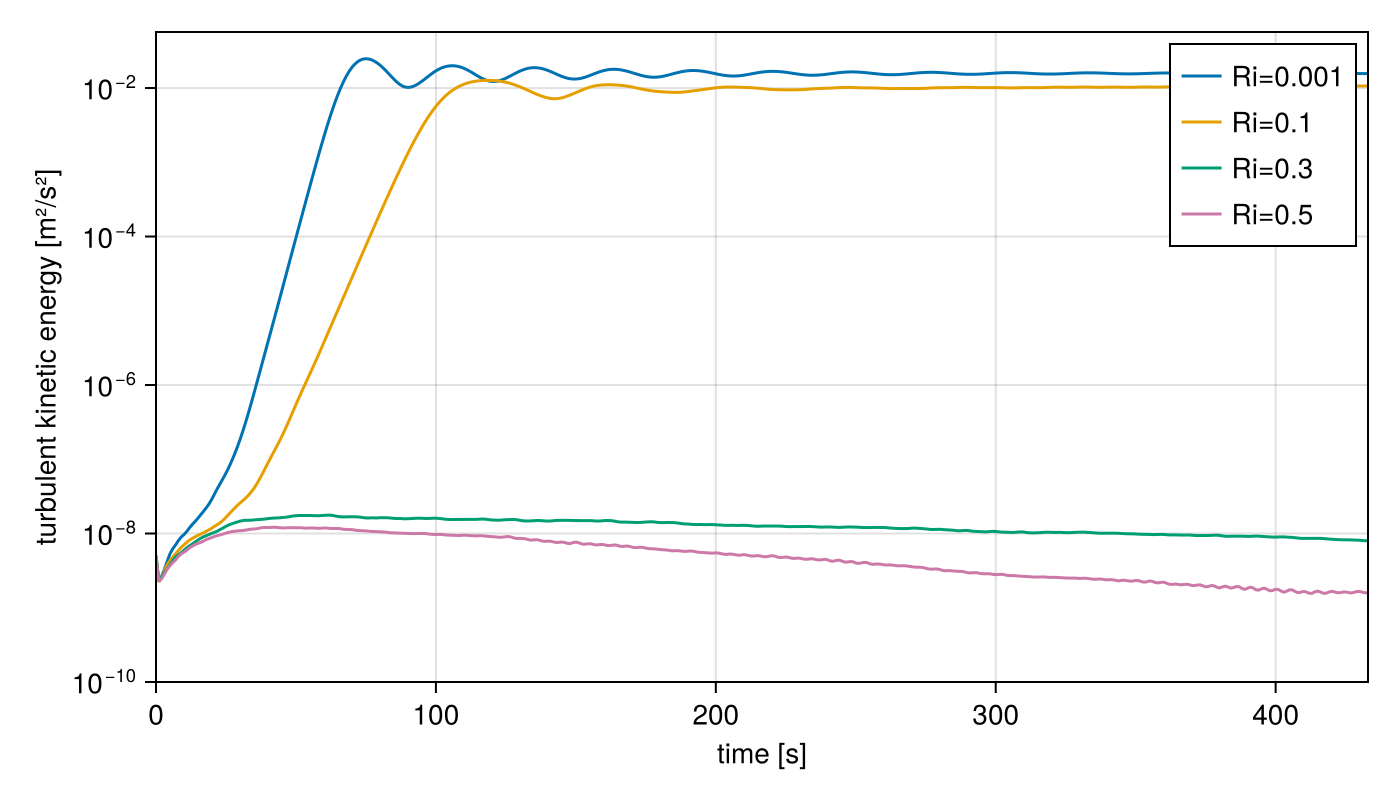

In [41]:
ds_ex = NCDataset(string(rootdir, filelist[1]), "r")
fig = Figure(size = (700, 400))
ax = Axis(
    fig[1, 1], xlabel = "time [s]", ylabel = "turbulent kinetic energy [m²/s²]",
    limits=((0, ds_ex["time"][end]), (1e-10, nothing)), yscale=log10
)
close(ds_ex)

for file in filelist
    ds = NCDataset(string(rootdir, file), "r")
    lines!(ax, ds["time"], ds["TKE"], label=string("Ri=", ds.attrib["Ri"]))
    close(ds)
end
axislegend(ax)
fig

In [42]:
ds_ex = NCDataset(string(rootdir, filelist[1]), "r")

Dataset: ../data/processed_output/shear_instability_TKE_Ri=0.001.nc
Group: /

Dimensions
   zC = 64
   zF = 65
   xC = 64
   yF = 1
   xF = 64
   yC = 1
   time = 434

Variables
  zC   (64)
    Datatype:    Float64 (Float64)
    Dimensions:  zC
    Attributes:
     units                = m
     long_name            = Locations of the cell centers in the z-direction.

  zF   (65)
    Datatype:    Float64 (Float64)
    Dimensions:  zF
    Attributes:
     units                = m
     long_name            = Locations of the cell faces in the z-direction.

  xC   (64)
    Datatype:    Float64 (Float64)
    Dimensions:  xC
    Attributes:
     units                = m
     long_name            = Locations of the cell centers in the x-direction.

  yF   (1)
    Datatype:    Float64 (Float64)
    Dimensions:  yF
    Attributes:
     units                = m
     long_name            = Locations of the cell faces in the y-direction.

  xF   (64)
    Datatype:    Float64 (Float64)
    Dimensio